In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

path = "Imagenes para practica Manipulación del Histograma/"

Text(0.5, 1.0, 'Imagen Original')

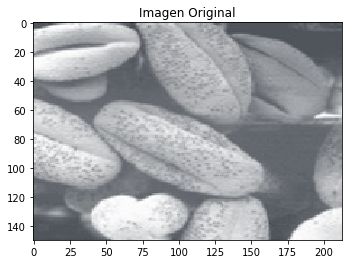

In [2]:
name = "Imagen Original.jpg"
original = Image.open(path + name)

plt.imshow(original)
plt.title("Imagen Original")

## Helpful functions

In [3]:
def get_histogram(image):
    height = image.shape[0]
    width = image.shape[1]

    if(len(image.shape) == 3):
        histogram = np.zeros((3,256))

        ##CODE TO CALCULATE RED, BLUE AND GREEN CHANNEL HISTOGRAM AT THE SAME TIME

        for channel in range(0, 3):
            for i in range(0, height):
                for j in range(0, width):
                    a = image[i][j][channel] - 1
                    histogram[channel][a] = histogram[channel][a] + 1

    return histogram

In [4]:
def desp(image, des):
    height = image.shape[0]
    width = image.shape[1]
    
    desp_image = image.copy()
    
    for channel in range(0, 3):
        for i in range(0, height):
            for j in range(0, width):
                value = image[i][j][channel]
                
                value = value + des
                
                if(value > 255):
                    value = 255
                
                elif(value < 0):
                    value = 0
                
                desp_image[i][j][channel] = np.uint8(value)
    
    return desp_image

In [5]:
def contraction(image, cmax, cmin):
    image_contr = image.copy()
    
    max_r = max(image_contr[:][:][0].flatten())
    min_r = min(image_contr[:][:][0].flatten())
    
    max_g = max(image_contr[:][:][1].flatten())
    min_g = min(image_contr[:][:][1].flatten())
    
    max_b = max(image_contr[:][:][2].flatten())
    min_b = min(image_contr[:][:][2].flatten())
    
    # En el canal r
    for i in range(0, image.shape[0]):
        for j in range(0, image.shape[1]):
            value = (((cmax - cmin) / (max_r - min_r)) * (image_contr[i][j][0] - min_r)) + cmin
            
            if(value > 255):
                value = 255
            
            elif(value < 0):
                value = 0
            
            image_contr[i][j][0] = np.uint8(value)
    
    # En el canal g
    for i in range(0, image.shape[0]):
        for j in range(0, image.shape[1]):
            value = (((cmax - cmin) / (max_g - min_g)) * (image_contr[i][j][1] - min_g)) + cmin
            
            if(value > 255):
                value = 255
            
            elif(value < 0):
                value = 0
            
            image_contr[i][j][1] = np.uint8(value)
    
    
    # En el canal b
    for i in range(0, image.shape[0]):
        for j in range(0, image.shape[1]):
            value = (((cmax - cmin) / (max_b - min_b)) * (image_contr[i][j][2] - min_b)) + cmin
            
            if(value > 255):
                value = 255
            
            elif(value < 0):
                value = 0
            
            image_contr[i][j][2] = np.uint8(value)
    
    return image_contr

In [6]:
def expantion(image, max_v, min_v):
    image_expan = image.copy()
    
    max_r = max(image_expan[:][:][0].flatten())
    min_r = min(image_expan[:][:][0].flatten())
    
    max_g = max(image_expan[:][:][1].flatten())
    min_g = min(image_expan[:][:][1].flatten())
    
    max_b = max(image_expan[:][:][2].flatten())
    min_b = min(image_expan[:][:][2].flatten())
    
    # En el canal r
    for i in range(0, image.shape[0]):
        for j in range(0, image.shape[1]):            
            value = (((image_expan[i][j][0] - min_r) / (max_r - min_r)) * (max_v - min_v)) + min_v
            
            if(value > 255):
                value = 255
            
            elif(value < 0):
                value = 0
            
            image_expan[i][j][0] = np.uint8(value)
    
    # En el canal g
    for i in range(0, image.shape[0]):
        for j in range(0, image.shape[1]):
            value = (((image_expan[i][j][1] - min_g) / (max_g - min_g)) * (max_v - min_v)) + min_v
            
            if(value > 255):
                value = 255
            
            elif(value < 0):
                value = 0
            
            image_expan[i][j][1] = np.uint8(value)
    
    
    # En el canal b
    for i in range(0, image.shape[0]):
        for j in range(0, image.shape[1]):
            value = (((image_expan[i][j][2] - min_b) / (max_b - min_b)) * (max_v - min_v)) + min_v
            
            if(value > 255):
                value = 255
            
            elif(value < 0):
                value = 0
            
            image_expan[i][j][2] = np.uint8(value)
    
    return image_expan

In [7]:
def equalization(image):
    pass

## Visualizing the 3 images

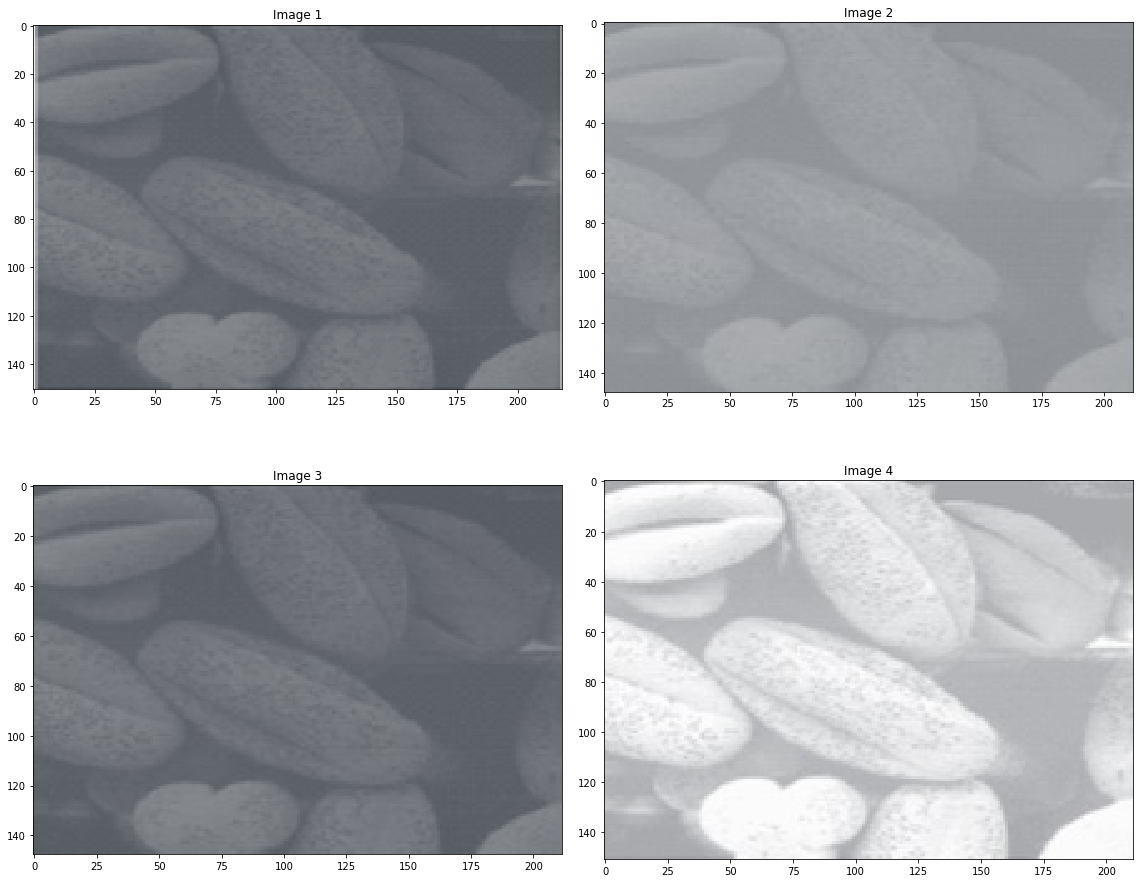

In [8]:
name = "Imagen1.png"
image1 = Image.open(path + name)

name = "Imagen2.jpg"
image2 = Image.open(path + name)

name = "Imagen3.jpg"
image3 = Image.open(path + name)

name = "Imagen4.jpg"
image4 = Image.open(path + name)

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize=(16,13))
plt.tight_layout()

axes[0][0].imshow(image1)
axes[0][0].set_title("Image 1")

axes[0][1].imshow(image2)
axes[0][1].set_title("Image 2")

axes[1][0].imshow(image3)
axes[1][0].set_title("Image 3")

axes[1][1].imshow(image4)
axes[1][1].set_title("Image 4")

image1 = np.asarray(image1)
image2 = np.asarray(image2)
image3 = np.asarray(image3)
image4 = np.asarray(image4)

# Modifying the first image 

## Desplazamiento

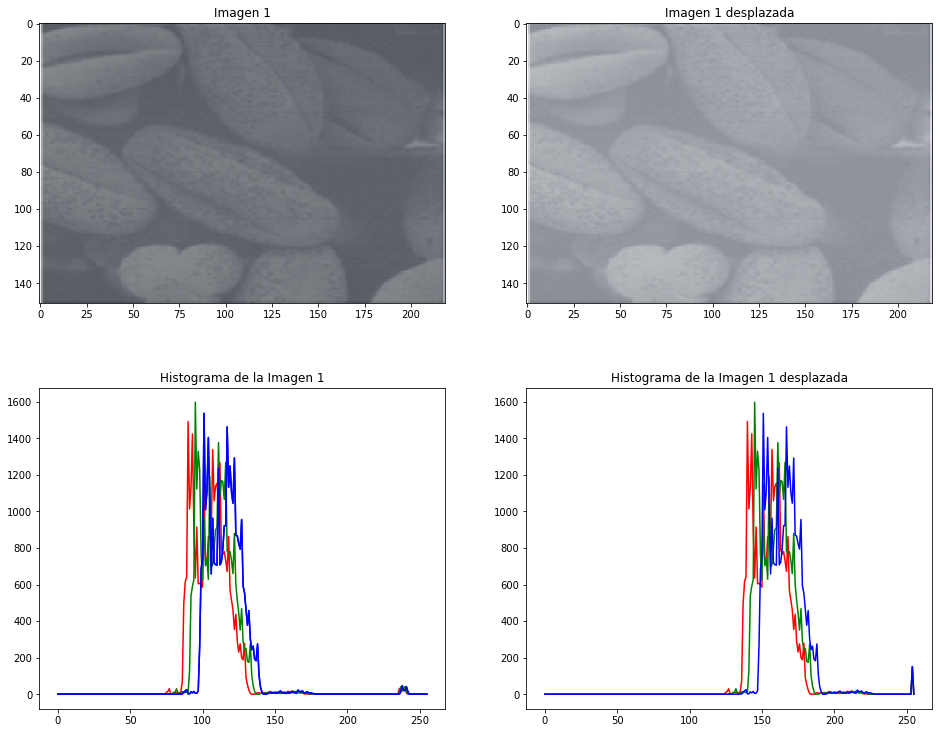

In [9]:
image1_desp = desp(image1, 50)
image1_hist = get_histogram(image1)
image1_desp_hist = get_histogram(image1_desp)

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (16, 13))

axes[0][0].imshow(image1)
axes[0][0].set_title("Imagen 1")

axes[0][1].imshow(image1_desp)
axes[0][1].set_title("Imagen 1 desplazada")

axes[1][0].plot(image1_hist[0], color = 'red')
axes[1][0].plot(image1_hist[1], color = 'green')
axes[1][0].plot(image1_hist[2], color = 'blue')
axes[1][0].plot(image1_hist[2], color = 'blue')
axes[1][0].set_title("Histograma de la Imagen 1")

axes[1][1].plot(image1_desp_hist[0], color = 'red')
axes[1][1].plot(image1_desp_hist[1], color = 'green')
axes[1][1].plot(image1_desp_hist[2], color = 'blue')
axes[1][1].set_title("Histograma de la Imagen 1 desplazada")

plt.show()

## Contraction

/home/fraga/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in ubyte_scalars
  app.launch_new_instance()
/home/fraga/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in ubyte_scalars


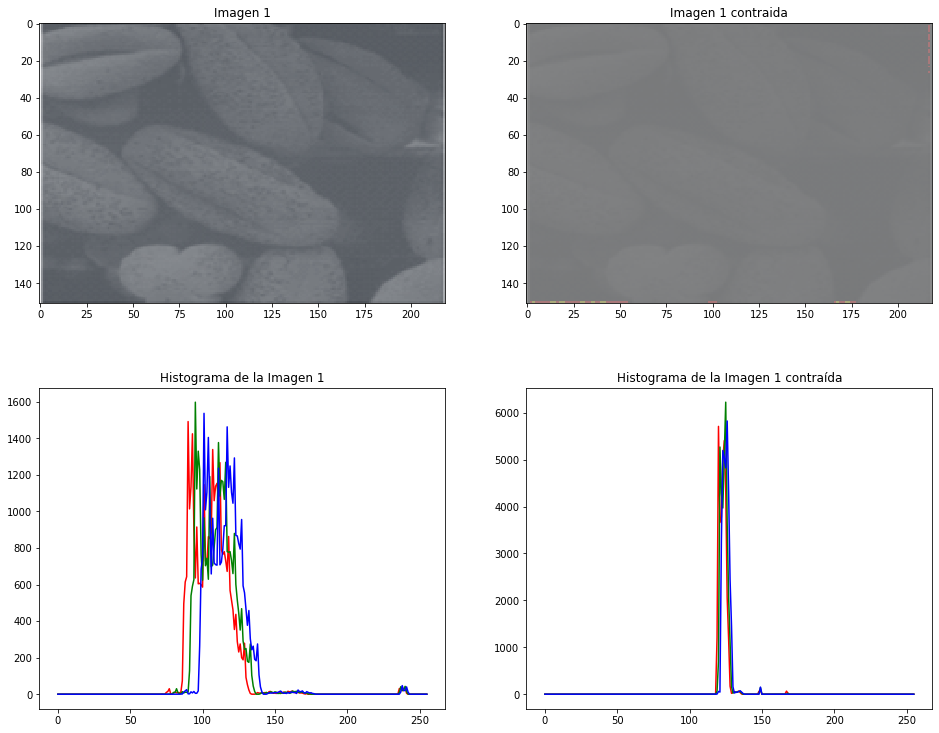

In [21]:
image1_contract = contraction(image1, 150, 120)
image1_contract_hist = get_histogram(image1_contract)

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (16, 13))

axes[0][0].imshow(image1)
axes[0][0].set_title("Imagen 1")

axes[0][1].imshow(image1_contract)
axes[0][1].set_title("Imagen 1 contraida")

axes[1][0].plot(image1_hist[0], color = 'red')
axes[1][0].plot(image1_hist[1], color = 'green')
axes[1][0].plot(image1_hist[2], color = 'blue')
axes[1][0].set_title("Histograma de la Imagen 1")

axes[1][1].plot(image1_contract_hist[0], color = 'red')
axes[1][1].plot(image1_contract_hist[1], color = 'green')
axes[1][1].plot(image1_contract_hist[2], color = 'blue')
axes[1][1].set_title("Histograma de la Imagen 1 contraída")

plt.show()

## Expantion

/home/fraga/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in ubyte_scalars
  app.launch_new_instance()
/home/fraga/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in ubyte_scalars


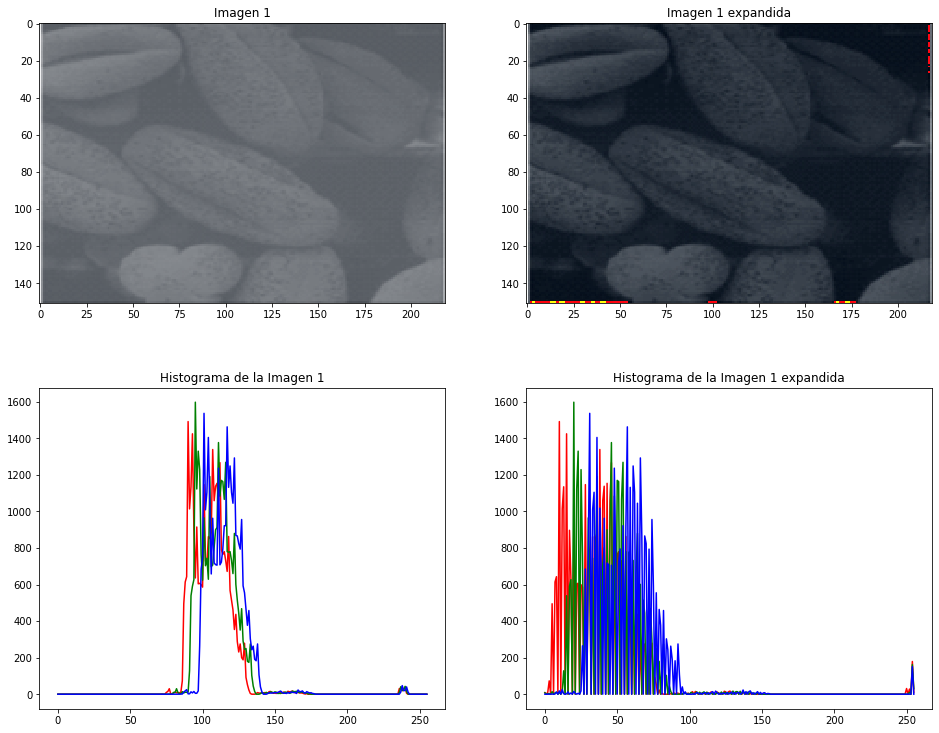

In [23]:
image1_expand = expantion(image1, 255, 0)
image1_expand_hist = get_histogram(image1_expand)

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (16, 13))

axes[0][0].imshow(image1)
axes[0][0].set_title("Imagen 1")

axes[0][1].imshow(image1_expand)
axes[0][1].set_title("Imagen 1 expandida")

axes[1][0].plot(image1_hist[0], color = 'red')
axes[1][0].plot(image1_hist[1], color = 'green')
axes[1][0].plot(image1_hist[2], color = 'blue')
axes[1][0].set_title("Histograma de la Imagen 1")

axes[1][1].plot(image1_expand_hist[0], color = 'red')
axes[1][1].plot(image1_expand_hist[1], color = 'green')
axes[1][1].plot(image1_expand_hist[2], color = 'blue')
axes[1][1].set_title("Histograma de la Imagen 1 expandida")

plt.show()

## Equalization

# Modifying the second image

## Desplazamiento

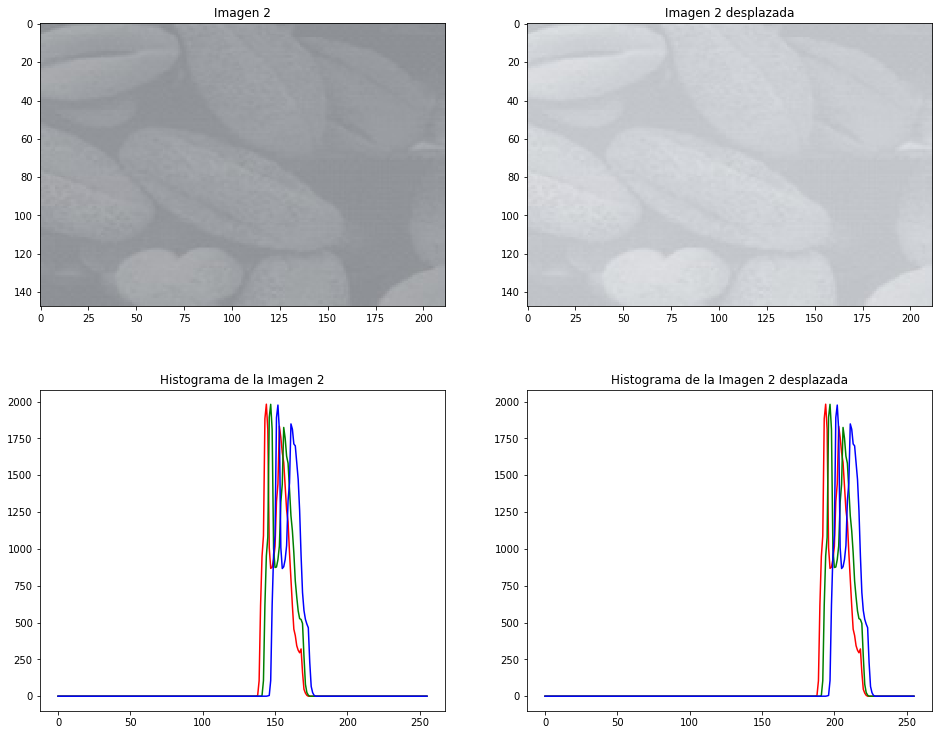

In [24]:
image2_desp = desp(image2, 50)
image2_hist = get_histogram(image2)
image2_desp_hist = get_histogram(image2_desp)

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (16, 13))

axes[0][0].imshow(image2)
axes[0][0].set_title("Imagen 2")

axes[0][1].imshow(image2_desp)
axes[0][1].set_title("Imagen 2 desplazada")

axes[1][0].plot(image2_hist[0], color = 'red')
axes[1][0].plot(image2_hist[1], color = 'green')
axes[1][0].plot(image2_hist[2], color = 'blue')
axes[1][0].set_title("Histograma de la Imagen 2")

axes[1][1].plot(image2_desp_hist[0], color = 'red')
axes[1][1].plot(image2_desp_hist[1], color = 'green')
axes[1][1].plot(image2_desp_hist[2], color = 'blue')
axes[1][1].set_title("Histograma de la Imagen 2 desplazada")

plt.show()

## Contraction

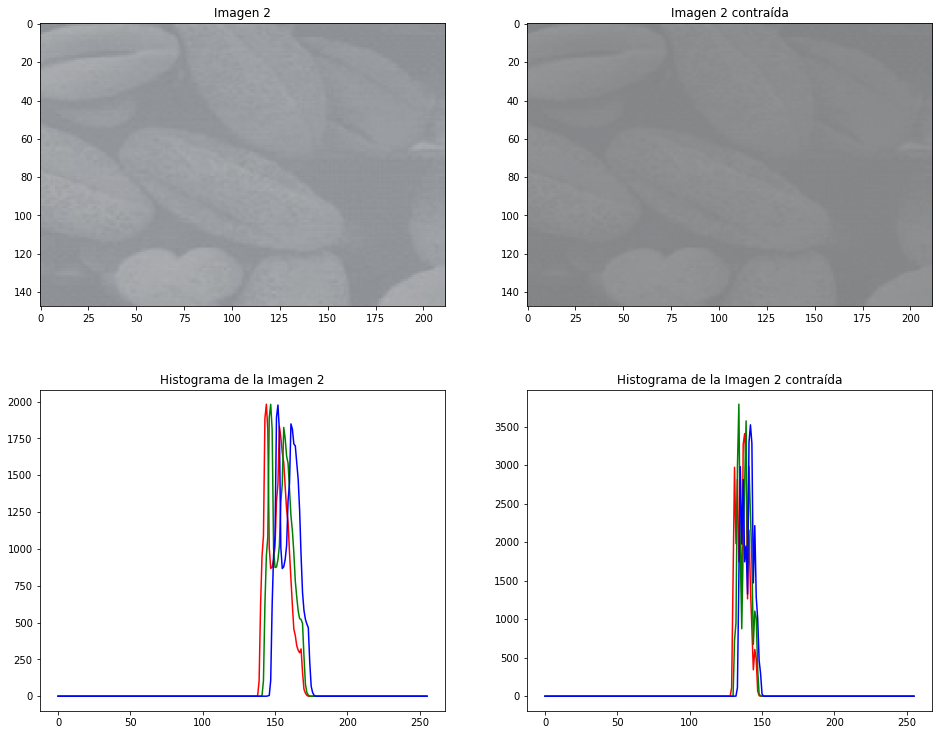

In [25]:
image2_contract = contraction(image2, 150, 130)
image2_contract_hist = get_histogram(image2_contract)

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (16, 13))

axes[0][0].imshow(image2)
axes[0][0].set_title("Imagen 2")

axes[0][1].imshow(image2_contract)
axes[0][1].set_title("Imagen 2 contraída")

axes[1][0].plot(image2_hist[0], color = 'red')
axes[1][0].plot(image2_hist[1], color = 'green')
axes[1][0].plot(image2_hist[2], color = 'blue')
axes[1][0].set_title("Histograma de la Imagen 2")

axes[1][1].plot(image2_contract_hist[0], color = 'red')
axes[1][1].plot(image2_contract_hist[1], color = 'green')
axes[1][1].plot(image2_contract_hist[2], color = 'blue')
axes[1][1].set_title("Histograma de la Imagen 2 contraída")

plt.show()

## Expantion

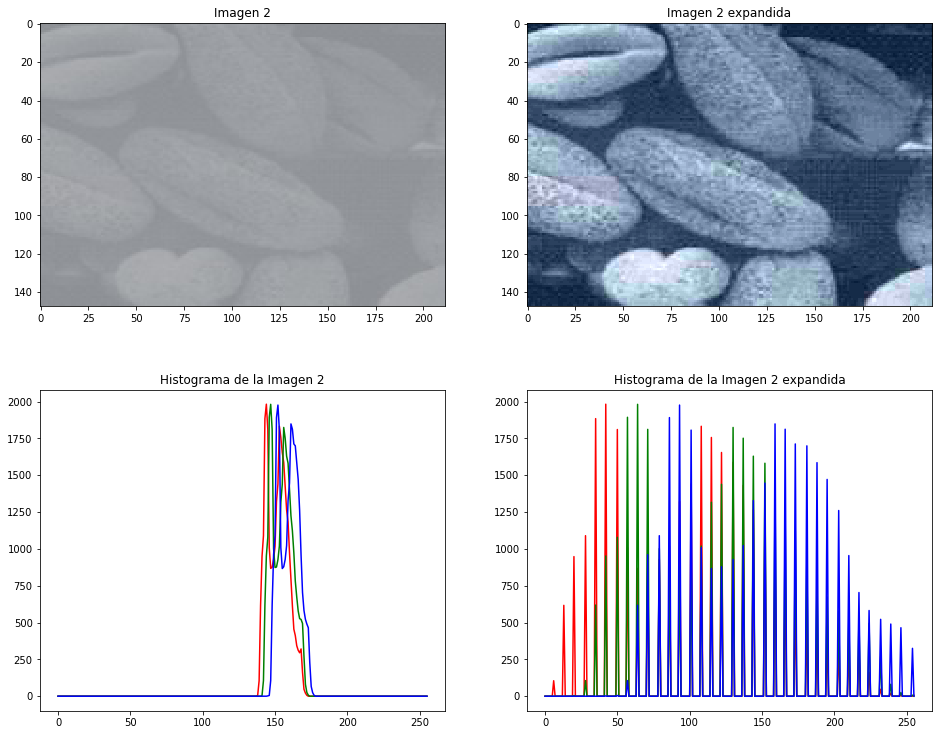

In [27]:
image2_expand = expantion(image2, 255, 0)
image2_expand_hist = get_histogram(image2_expand)

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (16, 13))

axes[0][0].imshow(image2)
axes[0][0].set_title("Imagen 2")

axes[0][1].imshow(image2_expand)
axes[0][1].set_title("Imagen 2 expandida")

axes[1][0].plot(image2_hist[0], color = 'red')
axes[1][0].plot(image2_hist[1], color = 'green')
axes[1][0].plot(image2_hist[2], color = 'blue')
axes[1][0].set_title("Histograma de la Imagen 2")

axes[1][1].plot(image2_expand_hist[0], color = 'red')
axes[1][1].plot(image2_expand_hist[1], color = 'green')
axes[1][1].plot(image2_expand_hist[2], color = 'blue')
axes[1][1].set_title("Histograma de la Imagen 2 expandida")

plt.show()

## Equalization

# Modifying the third image

## Desplazamiento

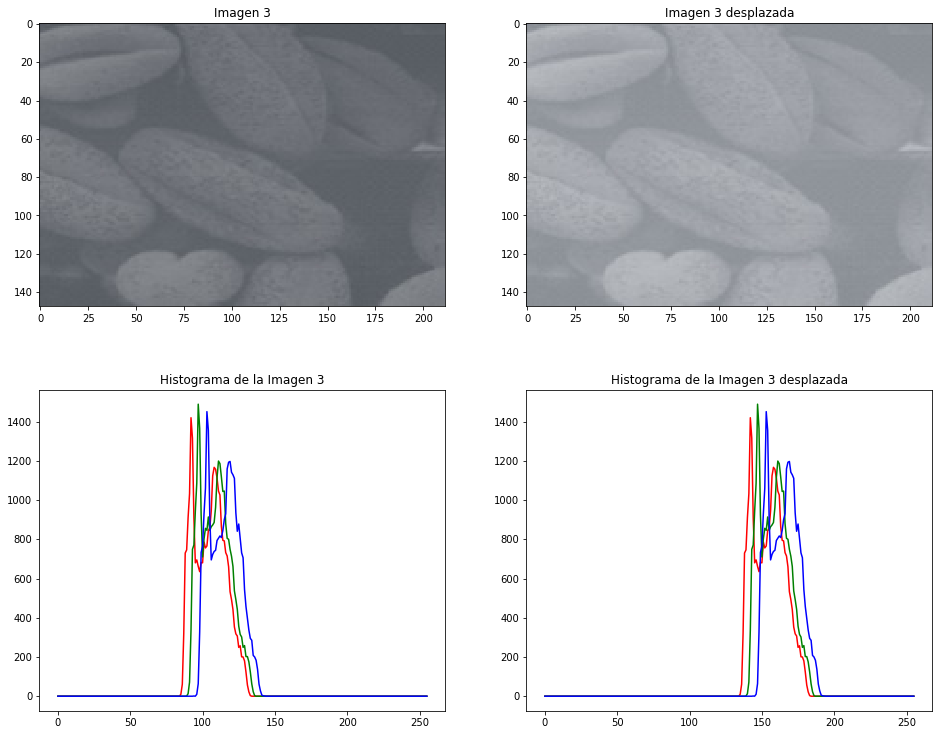

In [28]:
image3_desp = desp(image3, 50)
image3_hist = get_histogram(image3)
image3_desp_hist = get_histogram(image3_desp)

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (16, 13))

axes[0][0].imshow(image3)
axes[0][0].set_title("Imagen 3")

axes[0][1].imshow(image3_desp)
axes[0][1].set_title("Imagen 3 desplazada")

axes[1][0].plot(image3_hist[0], color = 'red')
axes[1][0].plot(image3_hist[1], color = 'green')
axes[1][0].plot(image3_hist[2], color = 'blue')
axes[1][0].set_title("Histograma de la Imagen 3")

axes[1][1].plot(image3_desp_hist[0], color = 'red')
axes[1][1].plot(image3_desp_hist[1], color = 'green')
axes[1][1].plot(image3_desp_hist[2], color = 'blue')
axes[1][1].set_title("Histograma de la Imagen 3 desplazada")

plt.show()

## Contraction

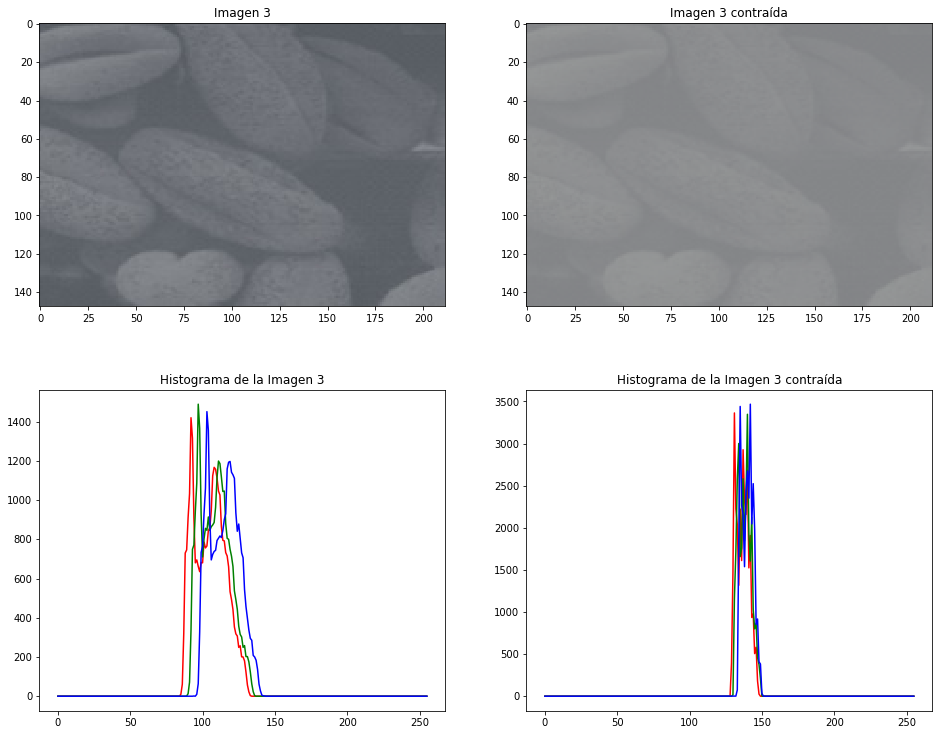

In [29]:
image3_contract = contraction(image3, 150, 130)
image3_contract_hist = get_histogram(image3_contract)

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (16, 13))

axes[0][0].imshow(image3)
axes[0][0].set_title("Imagen 3")

axes[0][1].imshow(image3_contract)
axes[0][1].set_title("Imagen 3 contraída")

axes[1][0].plot(image3_hist[0], color = 'red')
axes[1][0].plot(image3_hist[1], color = 'green')
axes[1][0].plot(image3_hist[2], color = 'blue')
axes[1][0].set_title("Histograma de la Imagen 3")

axes[1][1].plot(image3_contract_hist[0], color = 'red')
axes[1][1].plot(image3_contract_hist[1], color = 'green')
axes[1][1].plot(image3_contract_hist[2], color = 'blue')
axes[1][1].set_title("Histograma de la Imagen 3 contraída")

plt.show()

## Expantion 

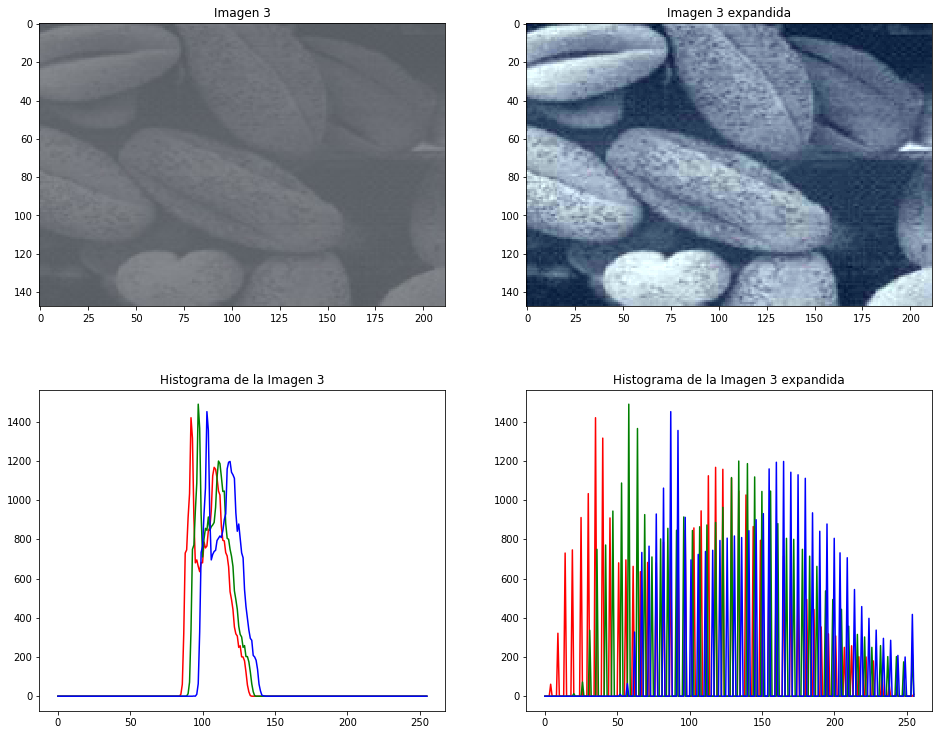

In [30]:
image3_expand = expantion(image3, 255, 0)
image3_expand_hist = get_histogram(image3_expand)

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (16, 13))

axes[0][0].imshow(image3)
axes[0][0].set_title("Imagen 3")

axes[0][1].imshow(image3_expand)
axes[0][1].set_title("Imagen 3 expandida")

axes[1][0].plot(image3_hist[0], color = 'red')
axes[1][0].plot(image3_hist[1], color = 'green')
axes[1][0].plot(image3_hist[2], color = 'blue')
axes[1][0].set_title("Histograma de la Imagen 3")

axes[1][1].plot(image3_expand_hist[0], color = 'red')
axes[1][1].plot(image3_expand_hist[1], color = 'green')
axes[1][1].plot(image3_expand_hist[2], color = 'blue')
axes[1][1].set_title("Histograma de la Imagen 3 expandida")

plt.show()

## Equalization

# Modifying the fourth image

## Desplazamiento

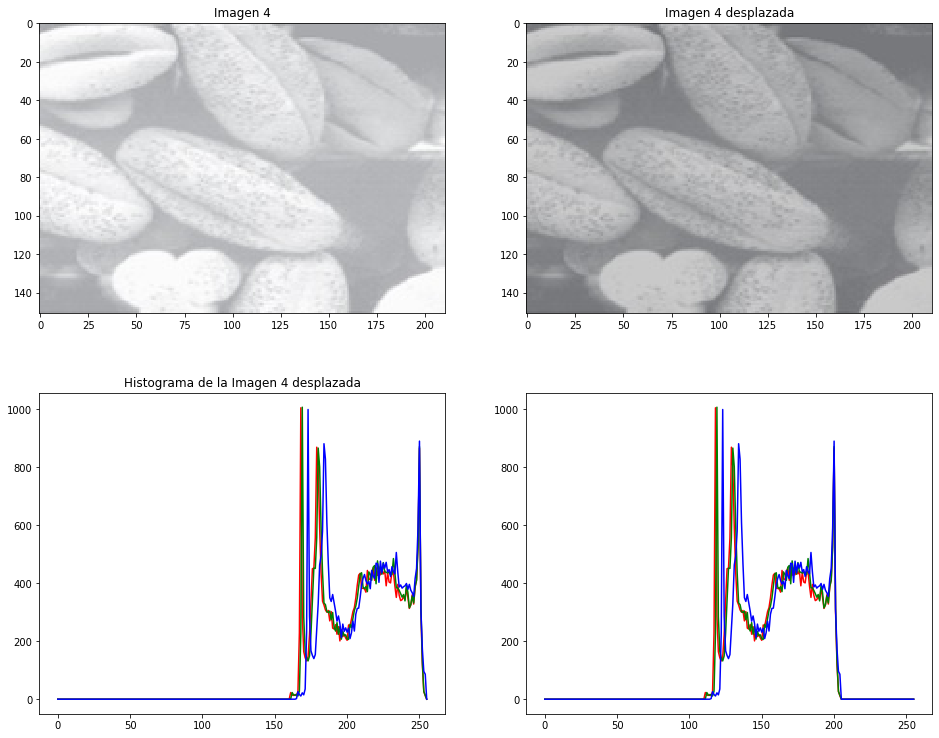

In [31]:
image4_desp = desp(image4, -50)
image4_hist = get_histogram(image4)
image4_desp_hist = get_histogram(image4_desp)

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (16, 13))

axes[0][0].imshow(image4)
axes[0][0].set_title("Imagen 4")

axes[0][1].imshow(image4_desp)
axes[0][1].set_title("Imagen 4 desplazada")

axes[1][0].plot(image4_hist[0], color = 'red')
axes[1][0].plot(image4_hist[1], color = 'green')
axes[1][0].plot(image4_hist[2], color = 'blue')
axes[1][0].set_title("Histograma de la Imagen 4")

axes[1][1].plot(image4_desp_hist[0], color = 'red')
axes[1][1].plot(image4_desp_hist[1], color = 'green')
axes[1][1].plot(image4_desp_hist[2], color = 'blue')
axes[1][0].set_title("Histograma de la Imagen 4 desplazada")

plt.show()

## Contraction

/home/fraga/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in ubyte_scalars
  app.launch_new_instance()
/home/fraga/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in ubyte_scalars


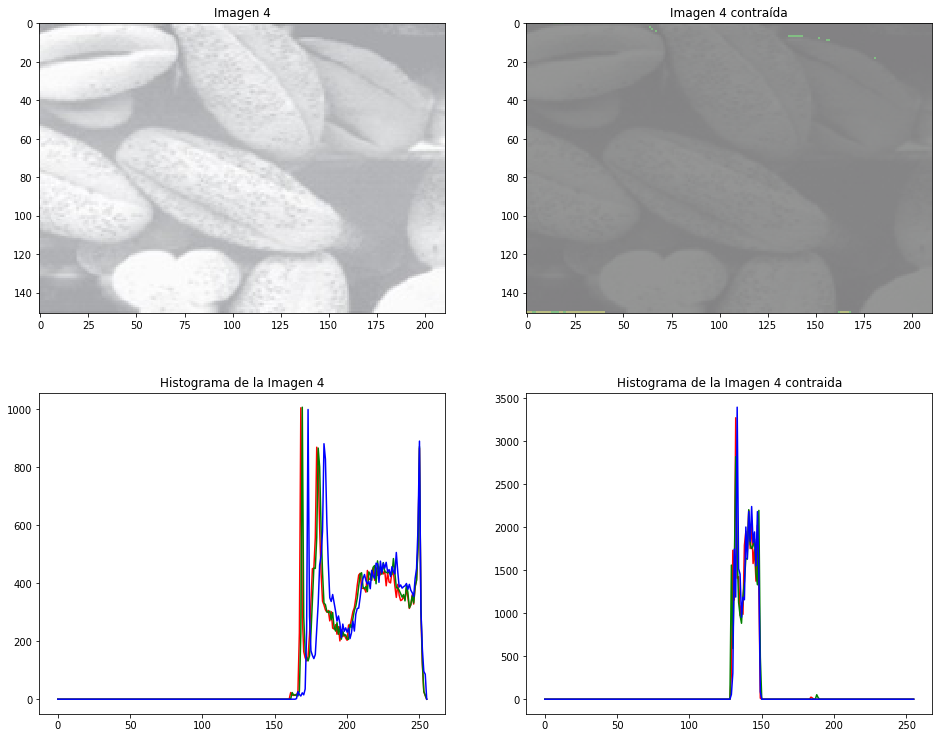

In [32]:
image4_contract = contraction(image4, 150, 130)
image4_contract_hist = get_histogram(image4_contract)

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (16, 13))

axes[0][0].imshow(image4)
axes[0][0].set_title("Imagen 4")

axes[0][1].imshow(image4_contract)
axes[0][1].set_title("Imagen 4 contraída")

axes[1][0].plot(image4_hist[0], color = 'red')
axes[1][0].plot(image4_hist[1], color = 'green')
axes[1][0].plot(image4_hist[2], color = 'blue')
axes[1][0].set_title("Histograma de la Imagen 4")

axes[1][1].plot(image4_contract_hist[0], color = 'red')
axes[1][1].plot(image4_contract_hist[1], color = 'green')
axes[1][1].plot(image4_contract_hist[2], color = 'blue')
axes[1][1].set_title("Histograma de la Imagen 4 contraida")

plt.show()

## Expantion

/home/fraga/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in ubyte_scalars
  app.launch_new_instance()
/home/fraga/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in ubyte_scalars


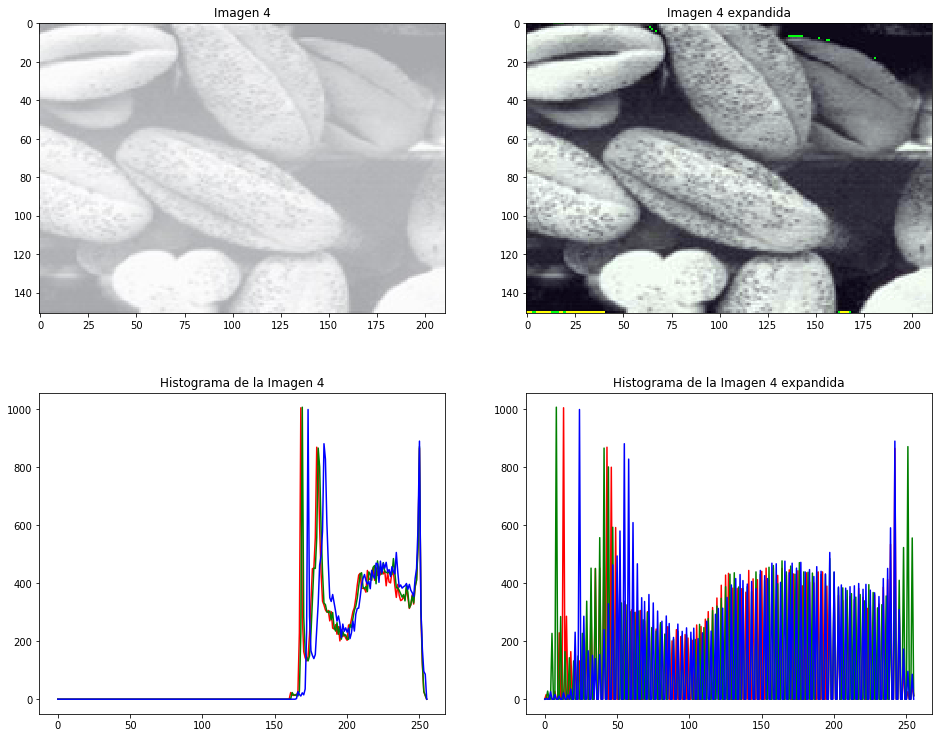

In [33]:
image4_expand = expantion(image4, 255, 0)
image4_expand_hist = get_histogram(image4_expand)

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (16, 13))

axes[0][0].imshow(image4)
axes[0][0].set_title("Imagen 4")

axes[0][1].imshow(image4_expand)
axes[0][1].set_title("Imagen 4 expandida")

axes[1][0].plot(image4_hist[0], color = 'red')
axes[1][0].plot(image4_hist[1], color = 'green')
axes[1][0].plot(image4_hist[2], color = 'blue')
axes[1][0].set_title("Histograma de la Imagen 4")

axes[1][1].plot(image4_expand_hist[0], color = 'red')
axes[1][1].plot(image4_expand_hist[1], color = 'green')
axes[1][1].plot(image4_expand_hist[2], color = 'blue')
axes[1][1].set_title("Histograma de la Imagen 4 expandida")

plt.show()

## Equalization